# Lupita Bravo Final Project GEO242 Fall 2025

Prior to doing anything, the cell below is going to load any packages I use throughout this JupyterNotebook.

In [1]:
#Load in packages
import utm
import numpy as np 
import pygmt
import pandas as pd
from IPython.display import Image
from scipy.optimize import curve_fit #https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

## Organizing the Data

After loading in the packages, we need to organize the data. I did this in a separate sh file but we can call it in here!

In [2]:
! ./Data_Organize1.sh

We can check what each file looks like here, I commented it out because I don't need to see it really. 

In [3]:
#! cat Data/SCEDC_Data/Northridge_1_year.txt

#! cat Data/Cleaned_Data/Northridge_1_year_cleaned.txt

#! cat Data/Cleaned_Data/pre1994.txt

#! cat Data/Cleaned_Data/Jan1994_April1994.txt

#! cat Data/Cleaned_Data/April1994_July1994.txt

#! cat Data/Cleaned_Data/July1994_Oct1994.txt

#! cat Data/Cleaned_Data/Oct1994_Jan1995.txt



# Map
Before I work on the Omori's law and calculating things, I'm going to work on the maps. The first map I made is for the background showing a basic map of California with faults and a star showing the rough location of there the 1994 Earthquake occurred. 

In [4]:
!./Basic_Map.sh

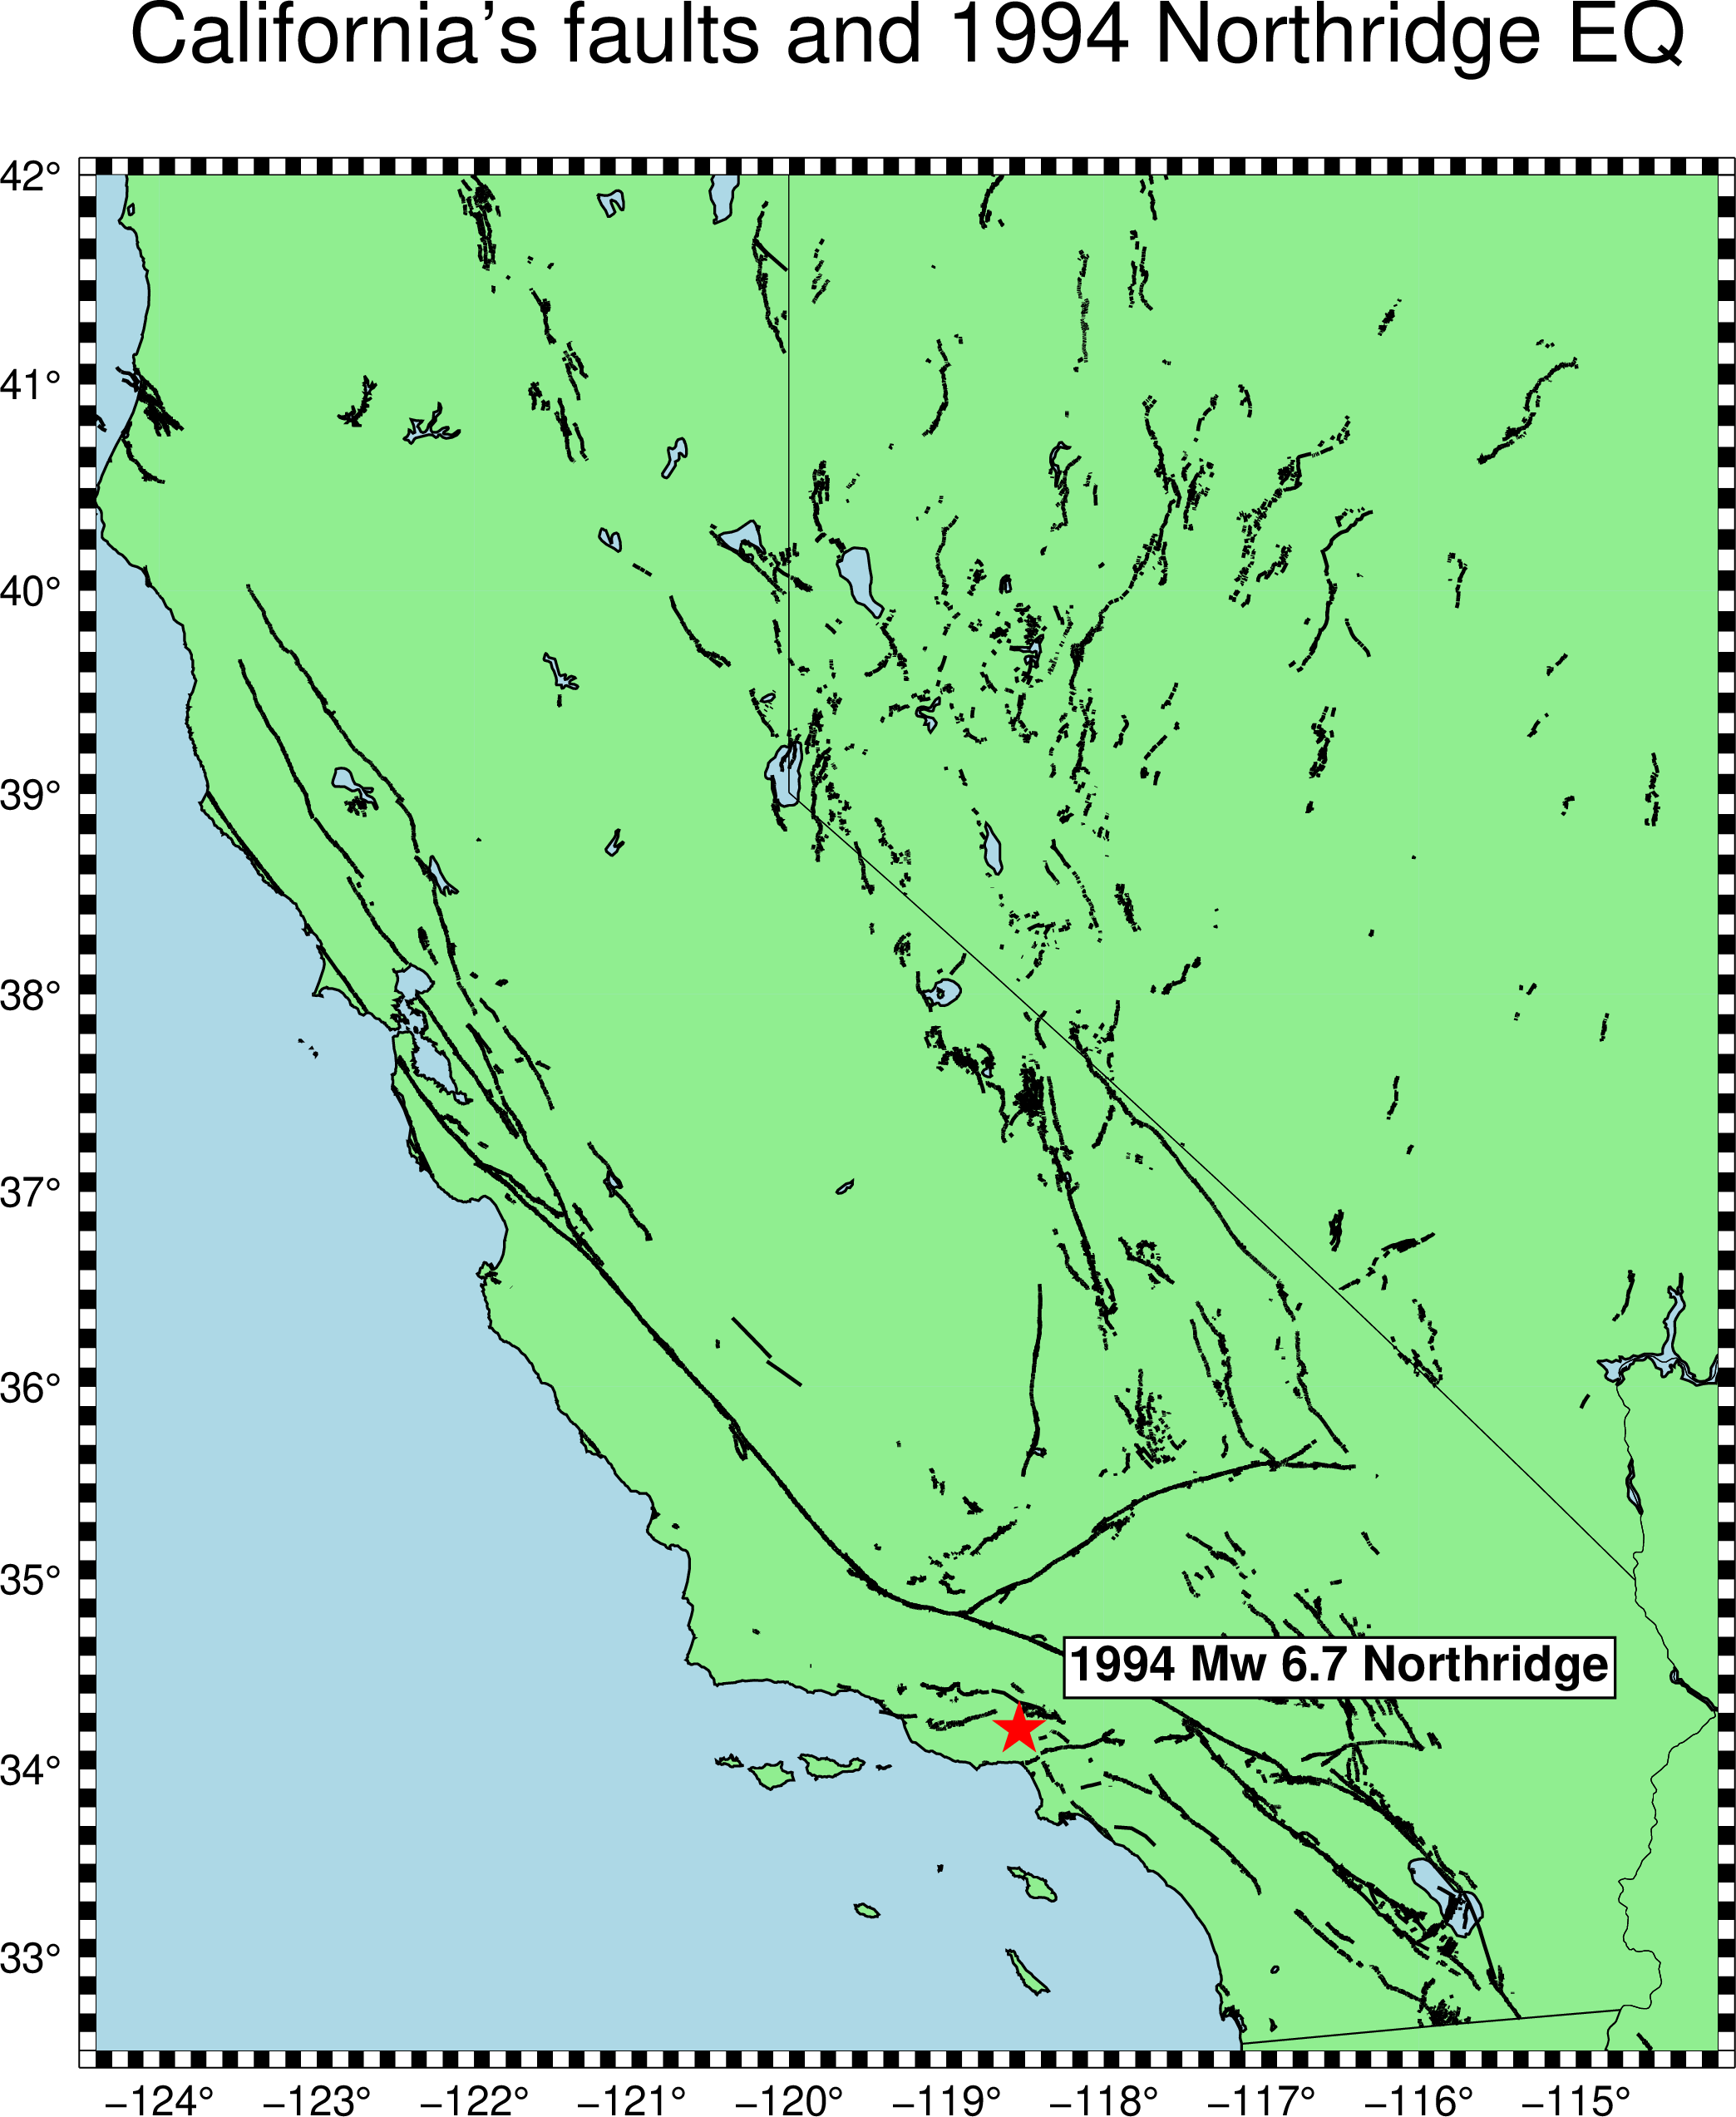

In [5]:
# get the image
Image(filename="Figures/Basic_map.ps.png", width=500, height=500)

This next map will be used later in my write up but it is a zoomed in map to the area where I got focusing on (San Fernando Valley/Northridge)

In [6]:

!./Seismicity_Map.sh

ERROR 1: PROJ: Cannot open https://cdn.proj.org/Und_min1x1_egm2008_isw=82_WGS84_TideFree: HTTP error 404: <?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>Und_min1x1_egm2008_isw=82_WGS84_TideFree</Key><RequestId>VVSF91HK22BBW0BR</RequestId><HostId>y3oDP5iqEzMptX3oC/Ity8q9kuaVH28IfygMwyA7SlnEBLdvaRGpYnLOVJPMHcDozU5e7vhwF58=</HostId></Error>
ERROR 1: PROJ: Cannot open https://cdn.proj.org/Und_min1x1_egm2008_isw=82_WGS84_TideFree: HTTP error 404: <?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>Und_min1x1_egm2008_isw=82_WGS84_TideFree</Key><RequestId>VVSF91HK22BBW0BR</RequestId><HostId>y3oDP5iqEzMptX3oC/Ity8q9kuaVH28IfygMwyA7SlnEBLdvaRGpYnLOVJPMHcDozU5e7vhwF58=</HostId></Error>
ERROR 1: PROJ: Cannot open https://cdn.proj.org/Und_min1x1_egm2008_isw=82_WGS84_TideFree: HTTP error 404: <?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuch

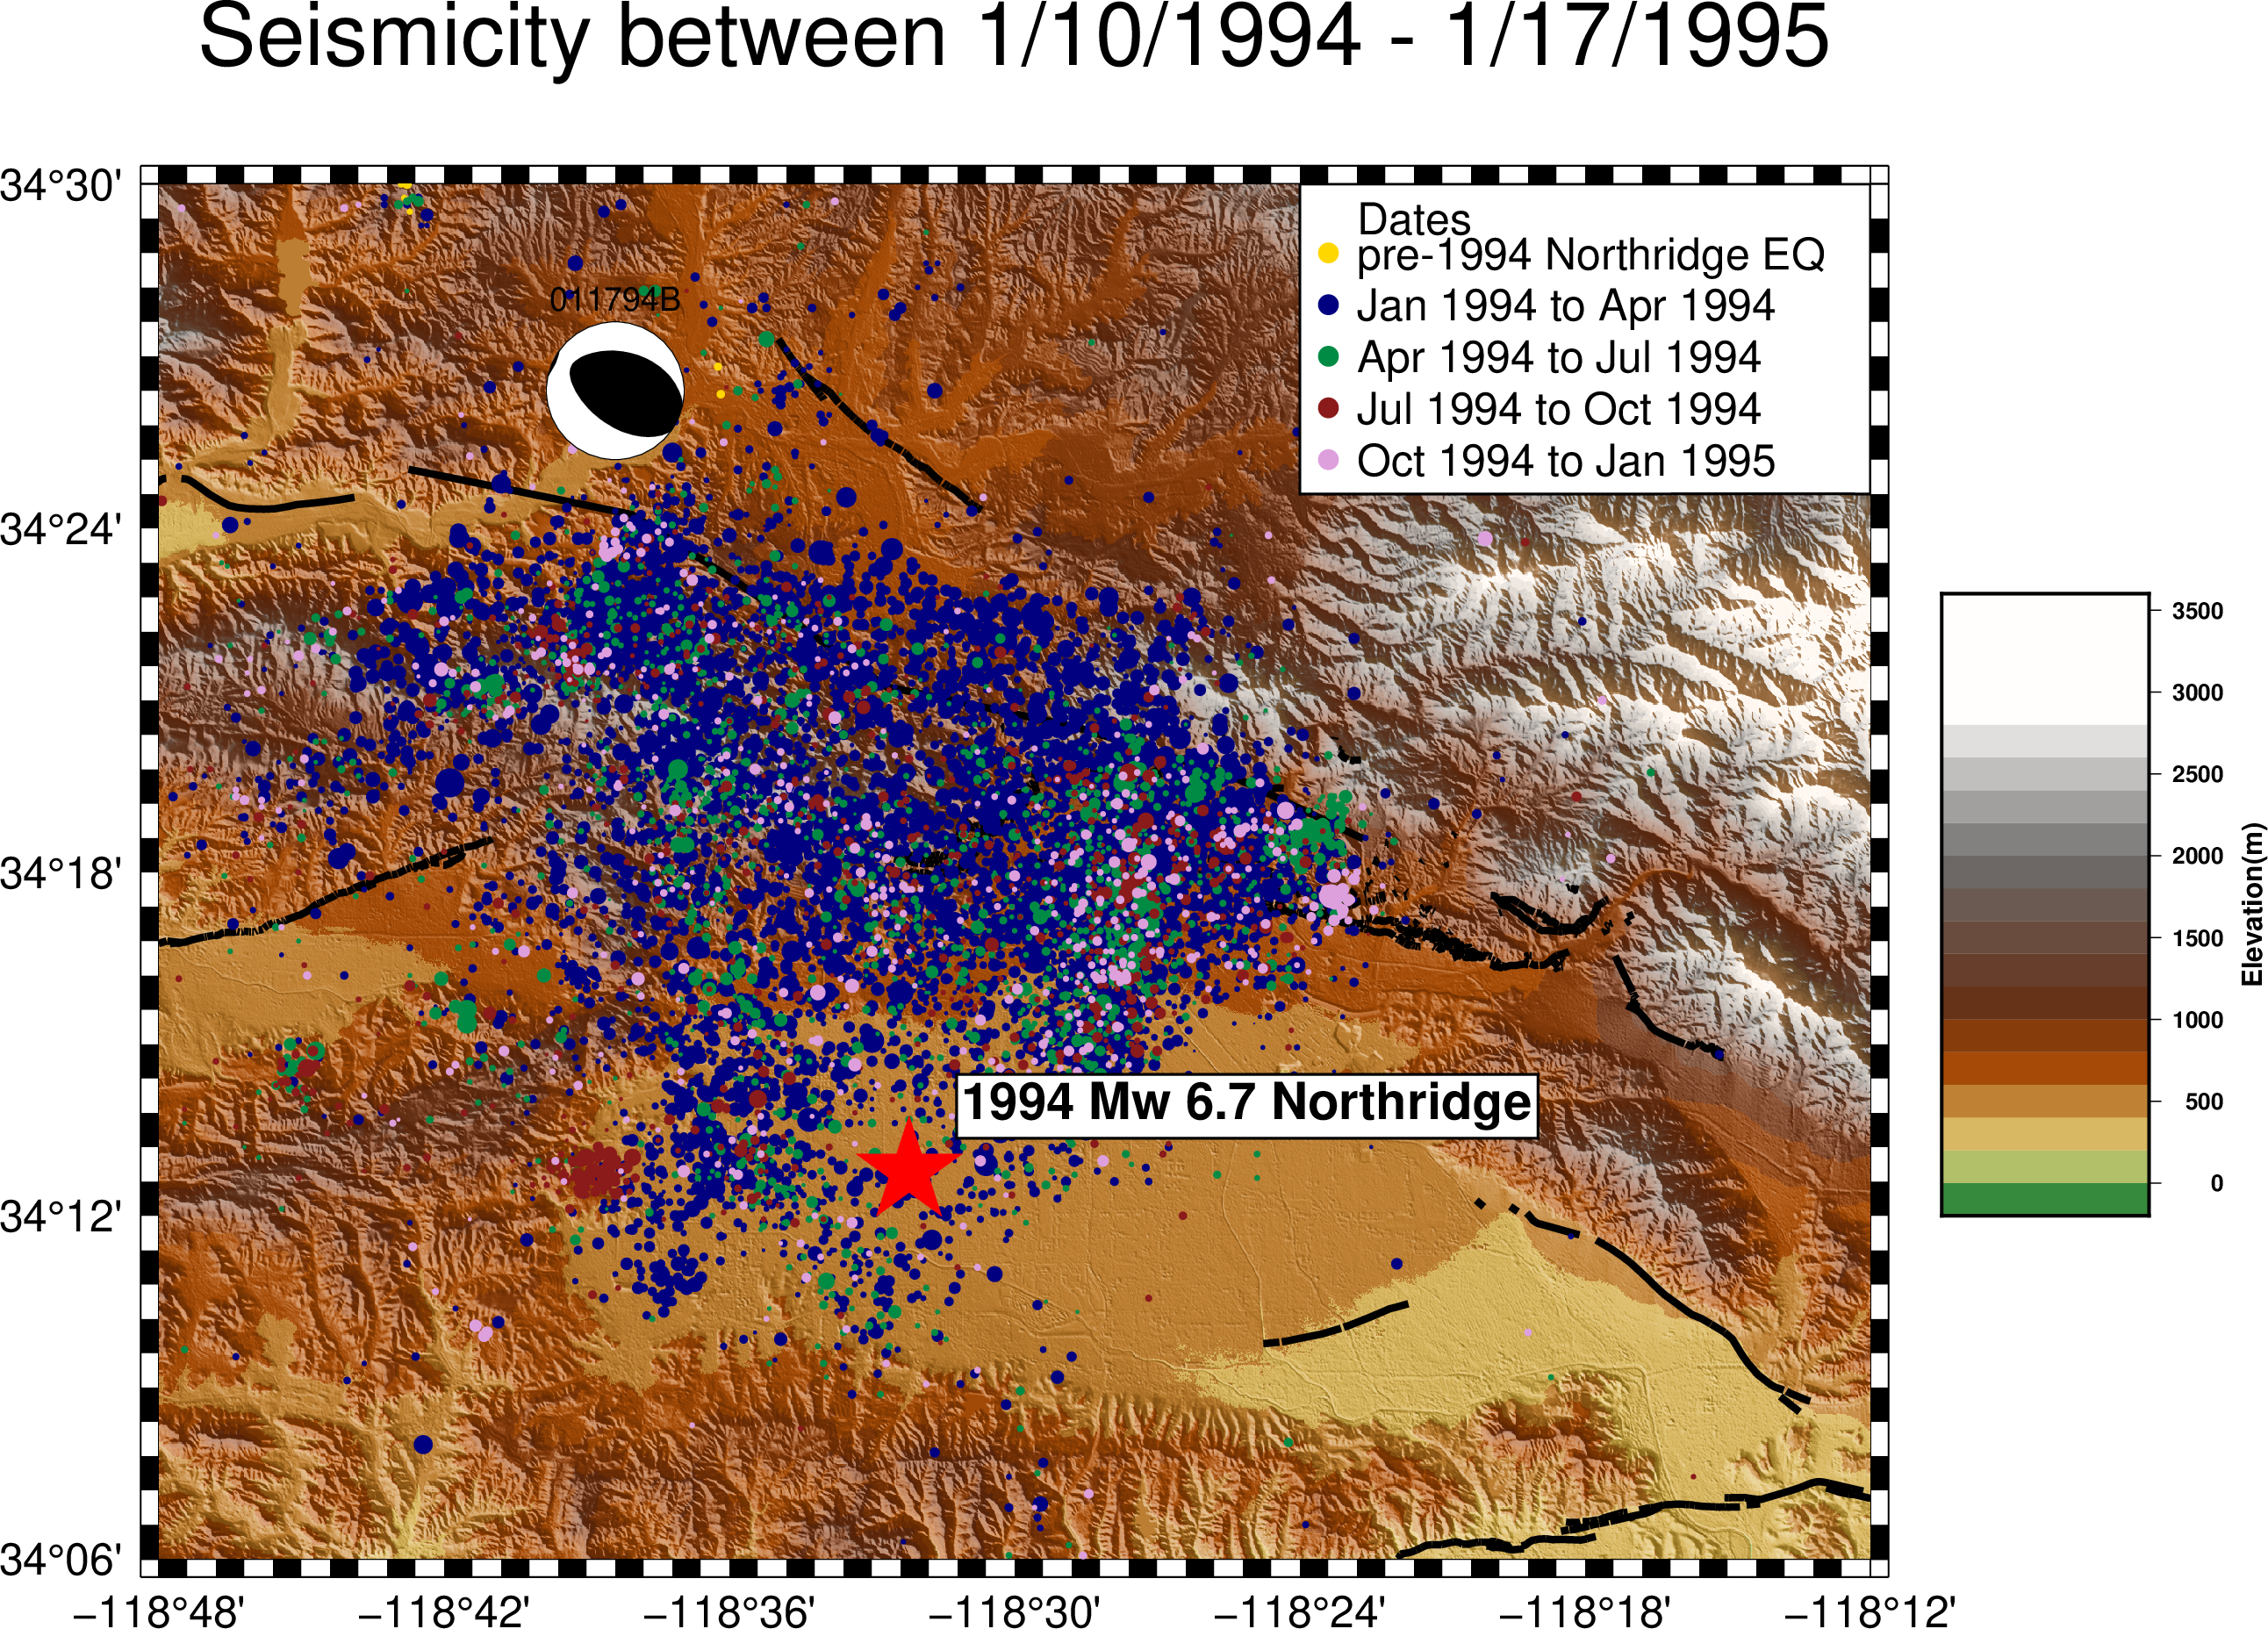

In [7]:
# get the image
Image(filename="Figures/Northridge_seismicity_map.ps.png", width=500, height=500)



# Loading in the data files
## Game Plan
So I now have data clumped in three month increment text files and made a map showing the seismicity. This next part is the analysis part so I'm going to plot the number of earthquakes in respect to time. Then I'll work on the Omori's law and fit a line to this data. Then try doing a fit to try to get a plane (similar to what we did in class), and lastly (if time permits) work on the magnitude of completeness and b-value. 


Update: I spent way too much time getitng the Omori stuff and maps to work... Time did not permit...

## Comments for data
Now to load in the text file. Previously I tried using "np.loadtxt('')" but it wasn't wokring so I ended up just using Pandas

In [8]:
#Read in the data text file
data1 = pd.read_csv('Data/Cleaned_Data/Northridge_1_year_cleaned.txt', sep=" ", header=None)
# Name the columns to say what they are
# YYY/MM/DD HH:mm:SS.ss MAG LAT LON  DEPTH 
data1.columns = ['date','time','mag','lat','lon','depth']


In [9]:
#Here I was printing stuff out as a sanity check
#print('data for one year head')
#print(data1.head())

#print('data for one year tail')
#print(data1.tail())

In [10]:
#Im going to make a new column where I combine the date and time 
data1['Date_Time']=pd.to_datetime(data1.date + " " + data1.time, format="%Y/%m/%d %H:%M:%S.%f")

In [11]:
#Checking that it worked
#print('data for one year head')
#print(data1.head())

# Plotting raw data for the entire time (1/14/1995-1/17/1995)

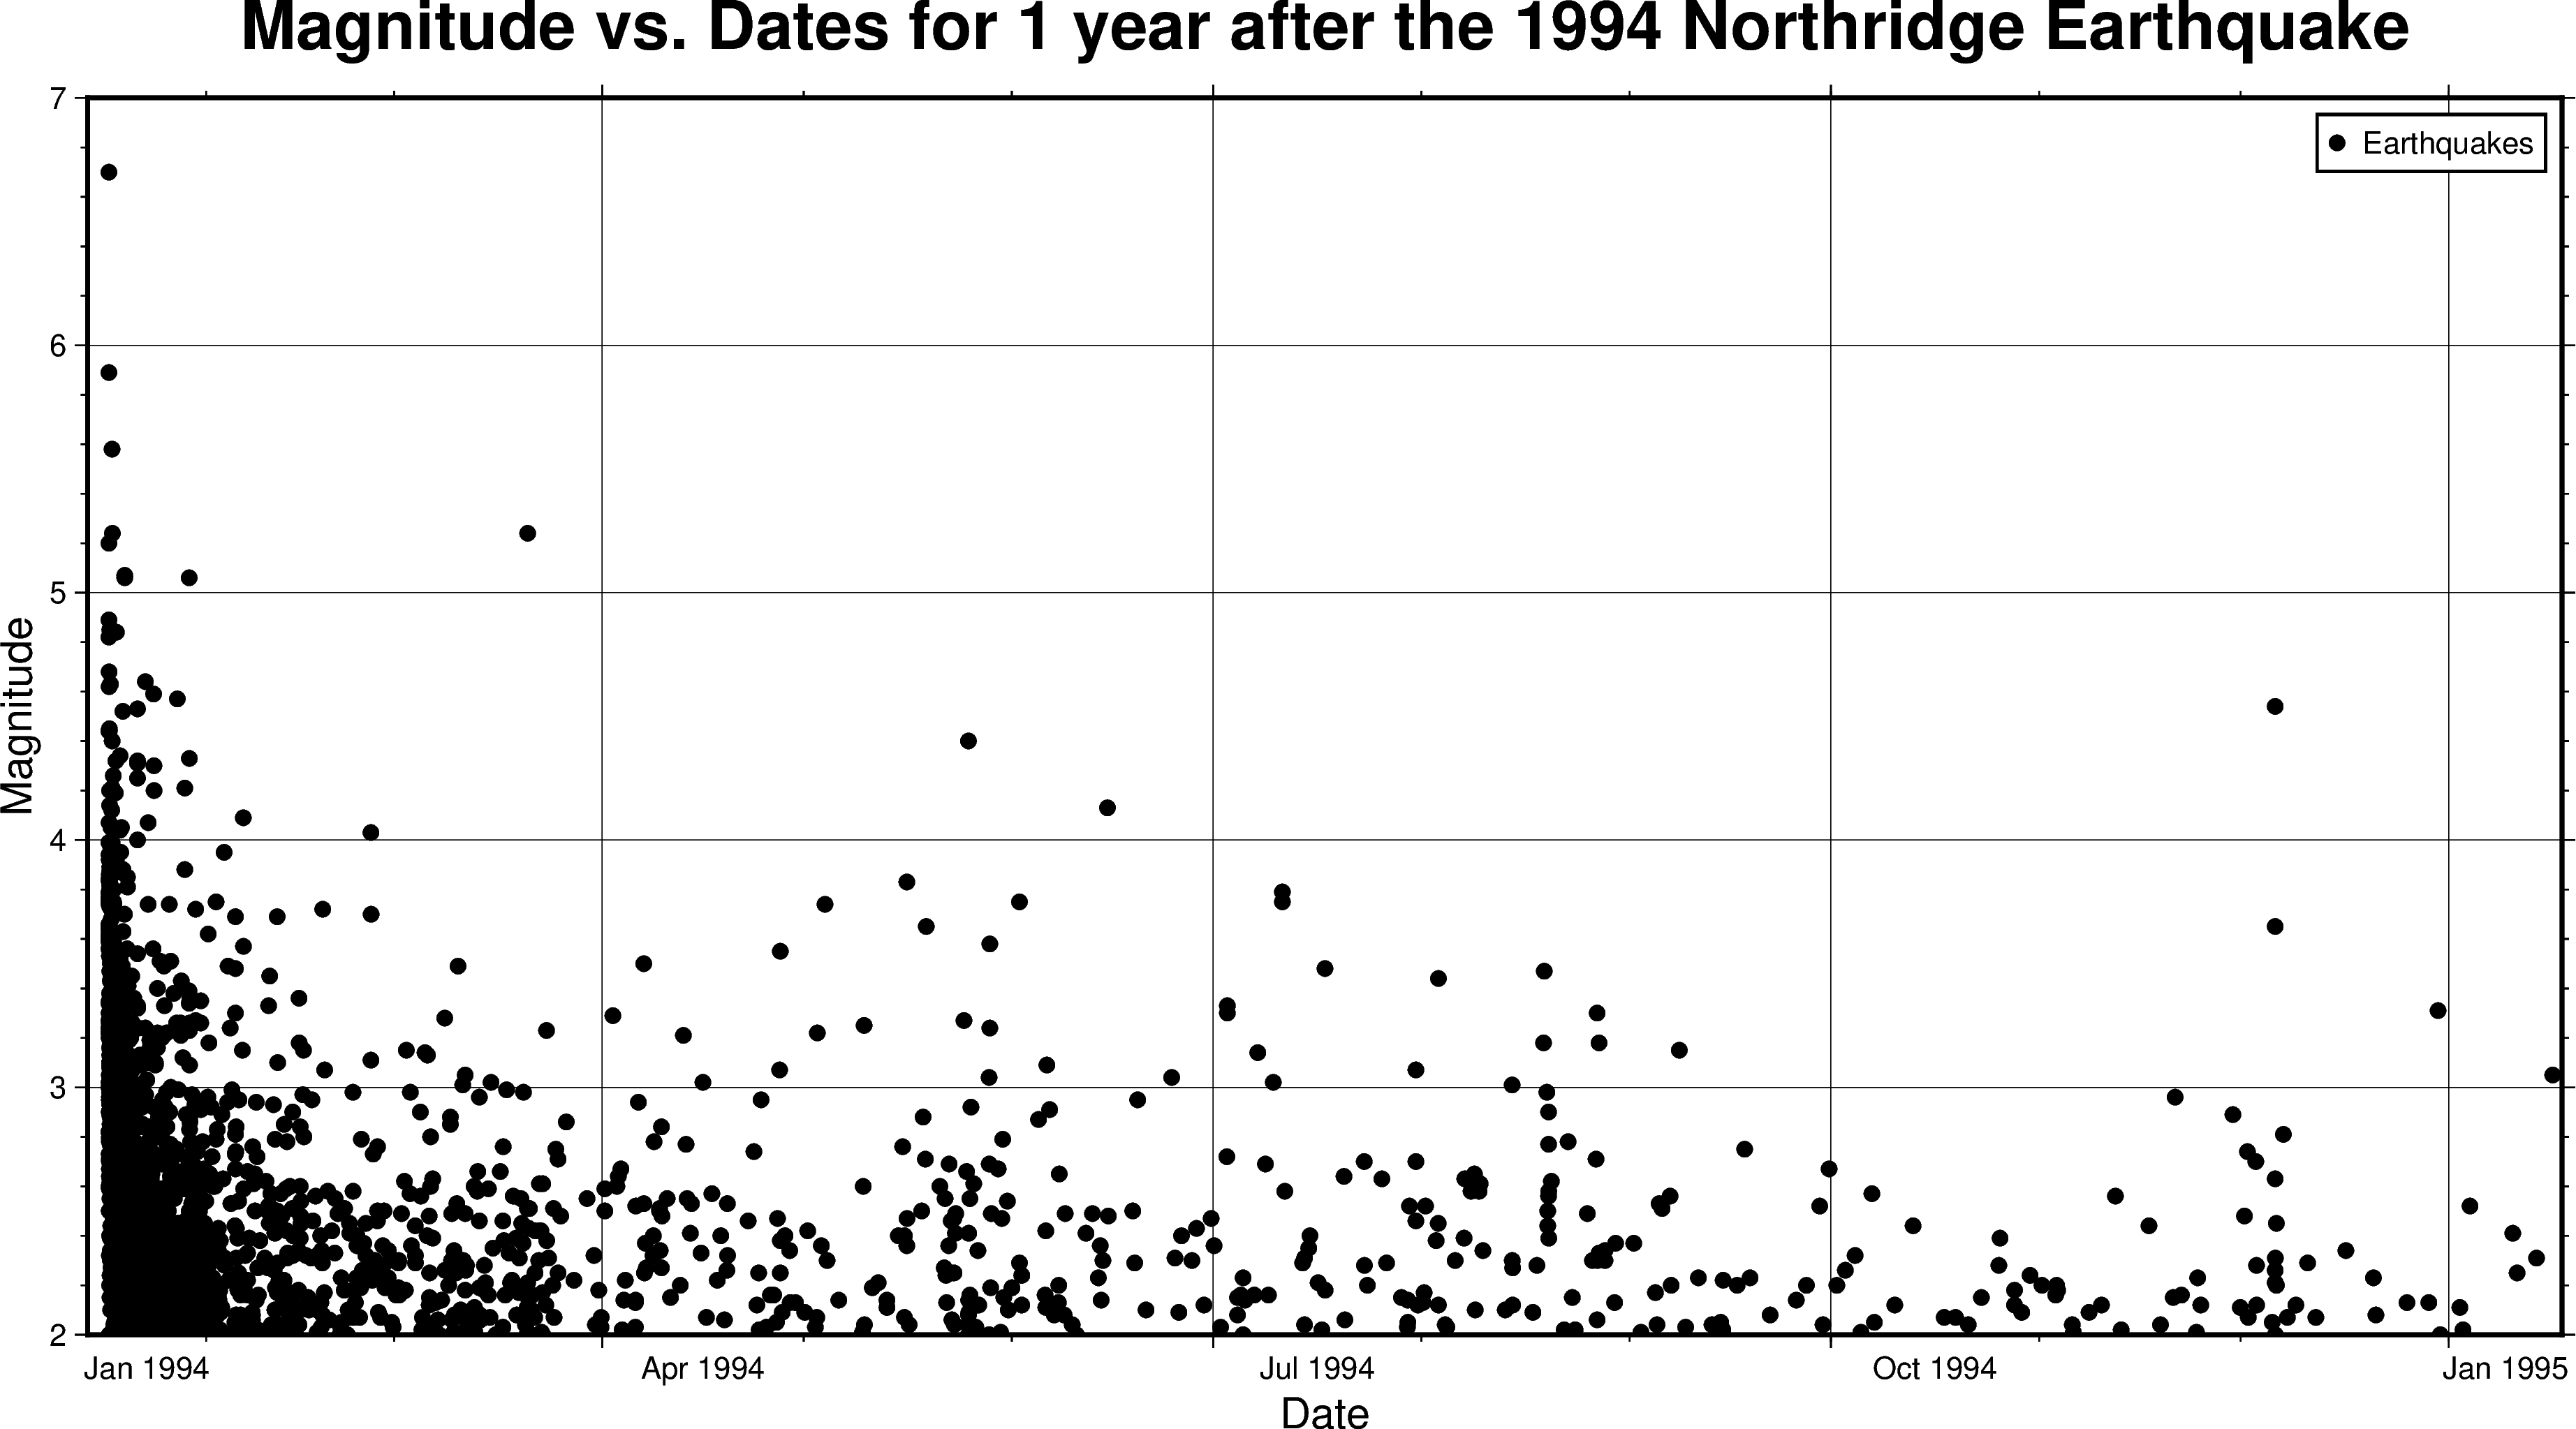

In [12]:
#Plotting the raw data of magnitudes and dates for each time frame
region=[np.min(data1.Date_Time),np.max(data1.Date_Time),2,7]
fig = pygmt.Figure()

fig.basemap(region=region, projection='X30c/15c', frame=[
            'WSen+tMagnitude vs. Dates for 1 year after the 1994 Northridge Earthquake',
            'xafg+lDate',
            'yafg+lMagnitude'
            ])

fig.plot(x=data1.Date_Time,y=data1.mag,style='c0.2c',fill='black',label='Earthquakes')
fig.legend()
fig.savefig('Figures/All_EQs_1_year_M_vs_T.pdf')
fig.show()

# Loadng in the rest of the data files and plotting those 
Essentially same plot as above but now color coded so that I can visually see what happens in three month increments. This is similar to the map however, it will be easier to visualize what it is I'm talking about.

In [13]:
#Read in the data text file
pre1994 = pd.read_csv('Data/Cleaned_Data/pre1994.txt', sep=" ", header=None)
# Name the columns
# YYY/MM/DD HH:mm:SS.ss MAG LAT LON  DEPTH 
pre1994.columns = ['date','time','mag','lat','lon','depth']
#Make that new column
pre1994['Date_Time']=pd.to_datetime(pre1994.date + " " + pre1994.time, format="%Y/%m/%d %H:%M:%S.%f")

#Read in the data text file
Jan1994_April1994 = pd.read_csv('Data/Cleaned_Data/Jan1994_April1994.txt', sep=" ", header=None)
# Name the columns
# YYY/MM/DD HH:mm:SS.ss MAG LAT LON  DEPTH 
Jan1994_April1994.columns = ['date','time','mag','lat','lon','depth']
#Make that new column
Jan1994_April1994['Date_Time']=pd.to_datetime(Jan1994_April1994.date + " " + Jan1994_April1994.time, format="%Y/%m/%d %H:%M:%S.%f")

#Read in the data text file
April1994_July1994 = pd.read_csv('Data/Cleaned_Data/April1994_July1994.txt', sep=" ", header=None)
# Name the columns
# YYY/MM/DD HH:mm:SS.ss MAG LAT LON  DEPTH 
April1994_July1994.columns = ['date','time','mag','lat','lon','depth']
#Make that new column
April1994_July1994['Date_Time']=pd.to_datetime(April1994_July1994.date + " " + April1994_July1994.time, format="%Y/%m/%d %H:%M:%S.%f")

#Read in the data text file
July1994_Oct1994 = pd.read_csv('Data/Cleaned_Data/July1994_Oct1994.txt', sep=" ", header=None)
# Name the columns
# YYY/MM/DD HH:mm:SS.ss MAG LAT LON  DEPTH 
July1994_Oct1994.columns = ['date','time','mag','lat','lon','depth']
#Make that new column
July1994_Oct1994['Date_Time']=pd.to_datetime(July1994_Oct1994.date + " " + July1994_Oct1994.time, format="%Y/%m/%d %H:%M:%S.%f")

#Read in the data text file
Oct1994_Jan1995 = pd.read_csv('Data/Cleaned_Data/Oct1994_Jan1995.txt', sep=" ", header=None)
# Name the columns
# YYY/MM/DD HH:mm:SS.ss MAG LAT LON  DEPTH 
Oct1994_Jan1995.columns = ['date','time','mag','lat','lon','depth']
#Make that new column
Oct1994_Jan1995['Date_Time']=pd.to_datetime(Oct1994_Jan1995.date + " " + Oct1994_Jan1995.time, format="%Y/%m/%d %H:%M:%S.%f")


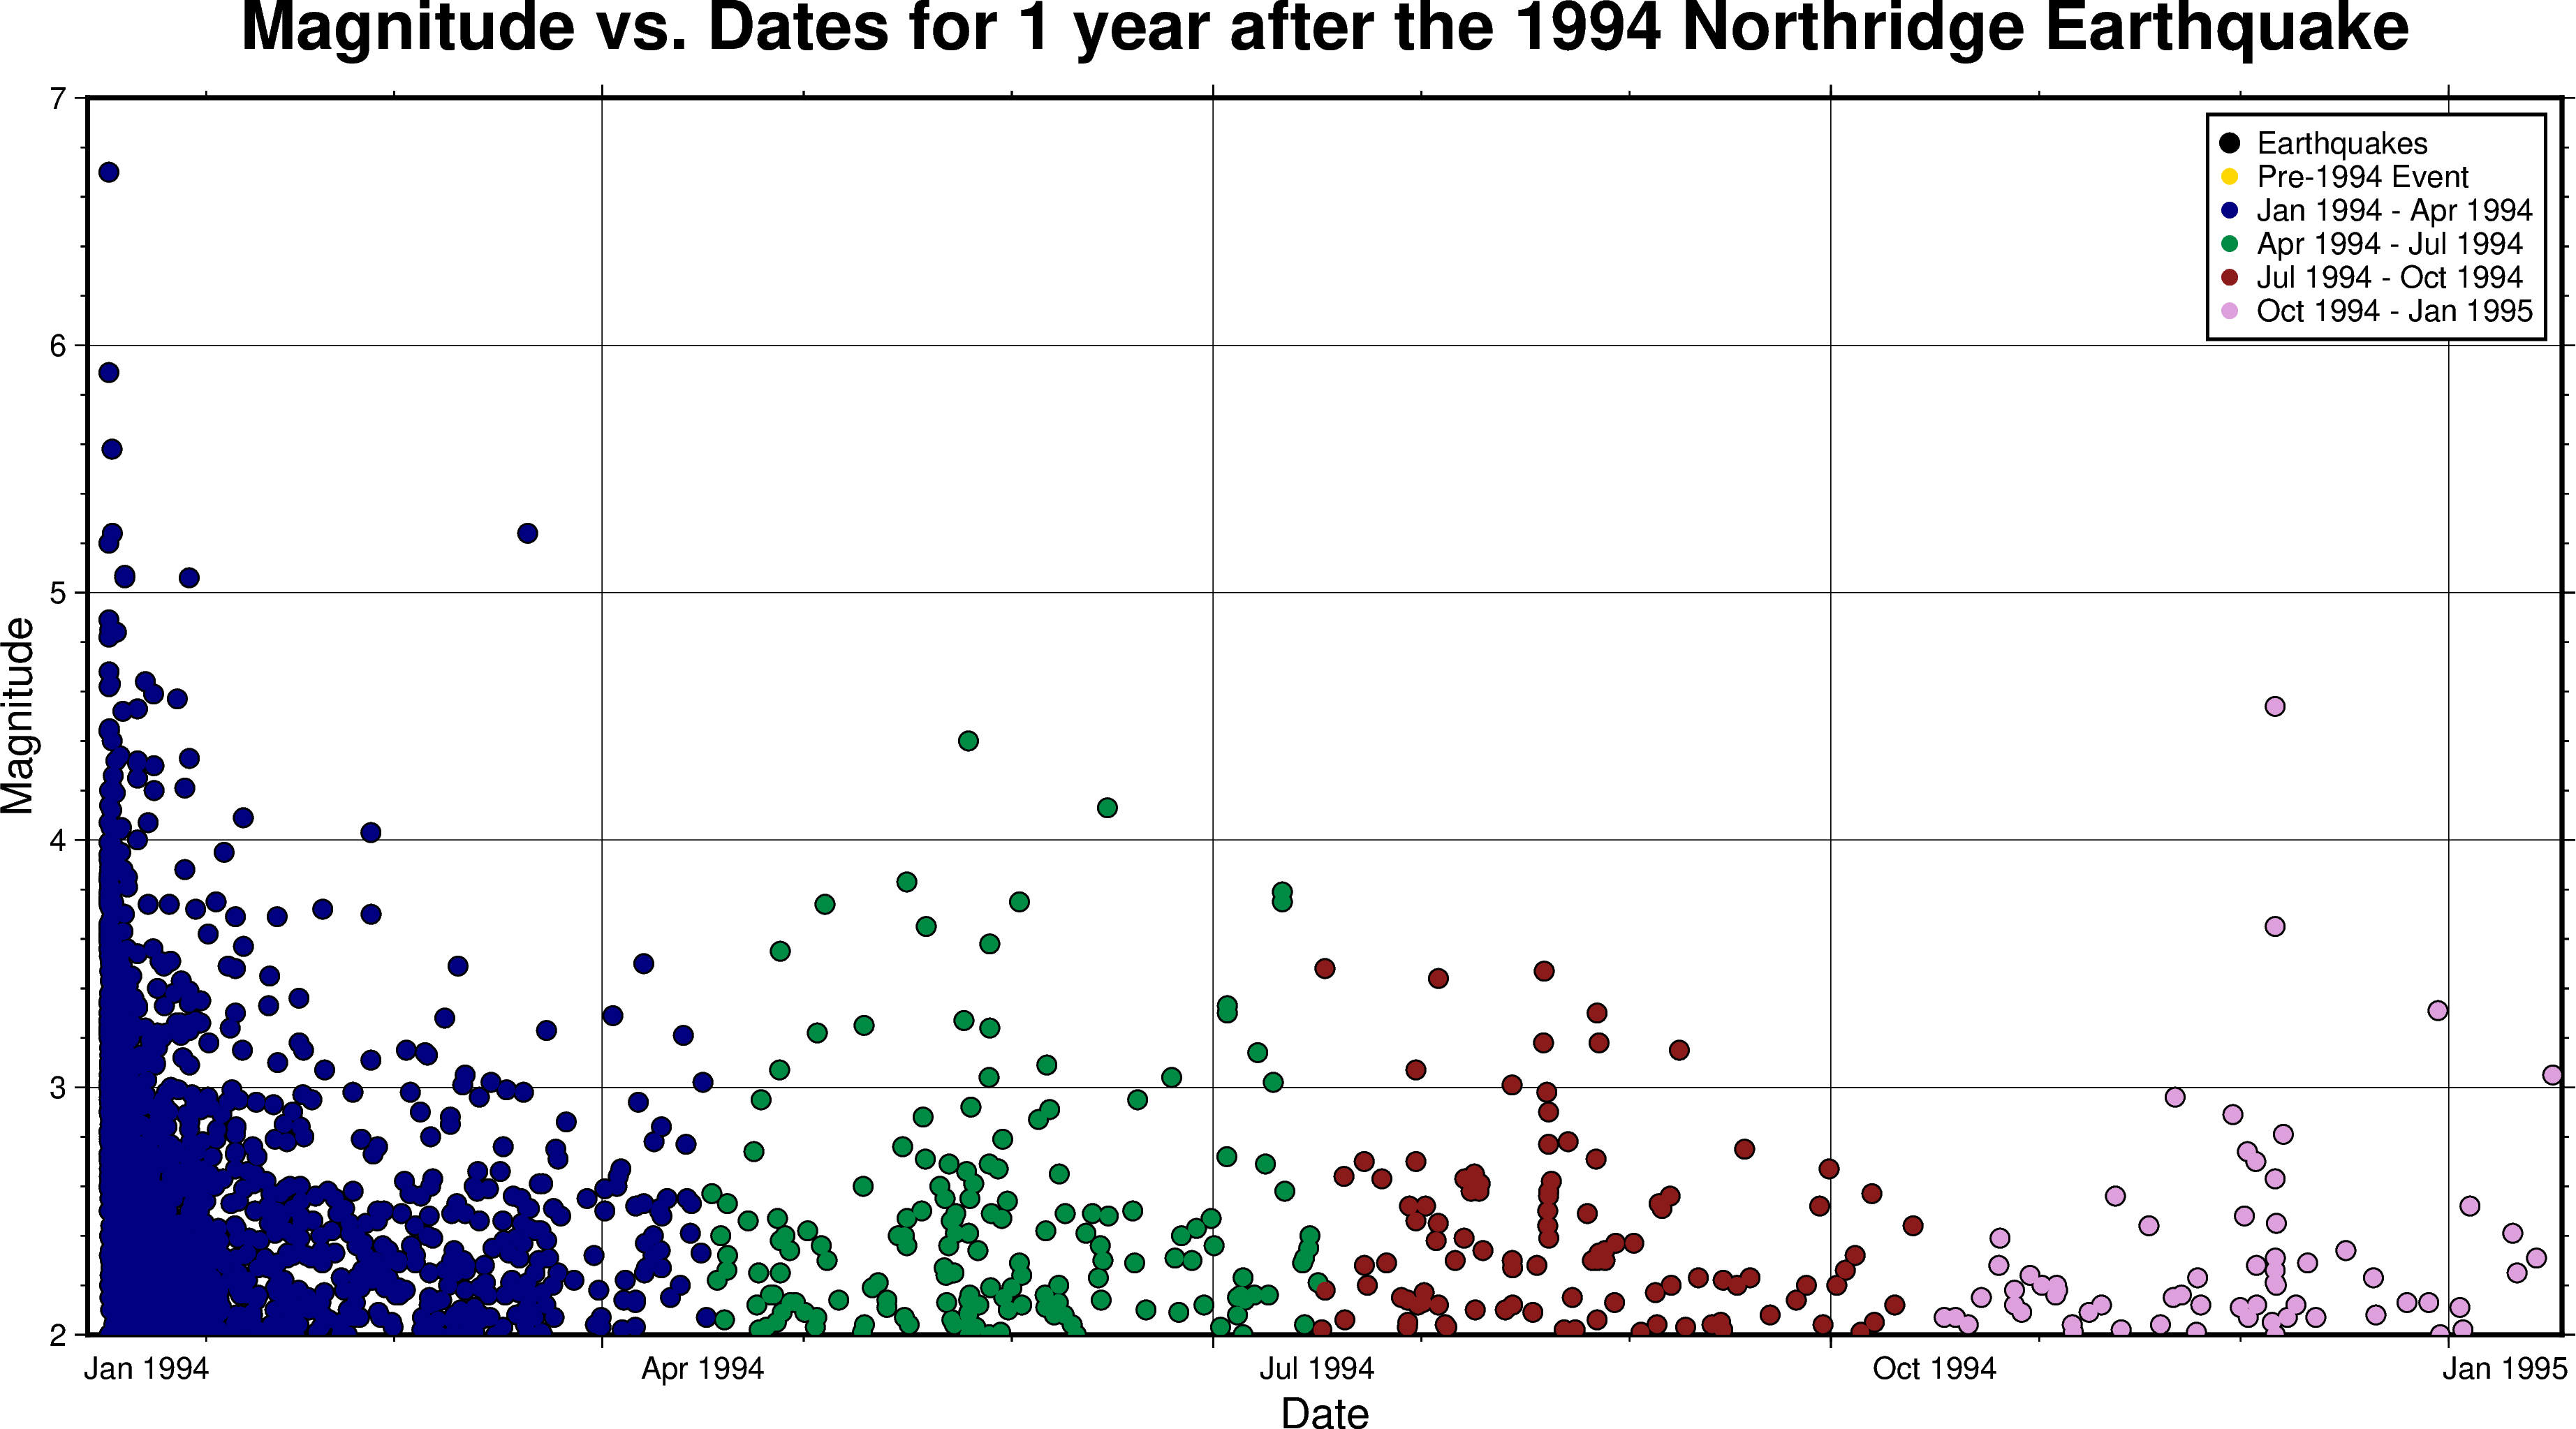

In [14]:
#Plotting the raw data of magnitudes and dates for each time frame
region=[np.min(data1.Date_Time),np.max(data1.Date_Time),2,7]
fig = pygmt.Figure()

fig.basemap(region=region, projection='X30c/15c', frame=[
            'WSen+tMagnitude vs. Dates for 1 year after the 1994 Northridge Earthquake',
            'xafg+lDate',
            'yafg+lMagnitude'
            ])

fig.plot(x=data1.Date_Time,y=data1.mag,style='c0.25c',fill='black',label='Earthquakes')
fig.plot(x=pre1994.Date_Time,y=pre1994.mag,style='c0.2c',fill='gold',label='Pre-1994 Event')
fig.plot(x=Jan1994_April1994.Date_Time,y=Jan1994_April1994.mag,style='c0.2c',fill='navy',label='Jan 1994 - Apr 1994')
fig.plot(x=April1994_July1994.Date_Time,y=April1994_July1994.mag,style='c0.2c',fill='springgreen4',label='Apr 1994 - Jul 1994')
fig.plot(x=July1994_Oct1994.Date_Time,y=July1994_Oct1994.mag,style='c0.2c',fill='firebrick4',label='Jul 1994 - Oct 1994')
fig.plot(x=Oct1994_Jan1995.Date_Time,y=Oct1994_Jan1995.mag,style='c0.2c',fill='plum',label='Oct 1994 - Jan 1995')
fig.legend()
fig.savefig('Figures/All_EQs_1_year_M_vs_T_Color_Coded.pdf')
fig.show()

# Omori's Law

So over time, we expect to see a decay in the number of aftershocks after a major event. This is usually not a linear fit/trend so I have to do a nonlinear fit (it looks like a curve so a curve fit) to show this decay over time. 

The equation for Omori's Law is

\begin{equation}
    n(t) = \frac{k}{(c+t)^p}
\end{equation}

Where: 
n(t)= the number of aftershocks in an interval at time t

k = constant

c = c is a positive number near zero

t = time

p = constant

*From Scholz_2019

In [15]:
#So this wouldn't be a linear fit (i.e. when we did the ATA) so I looked at the scipy.optimize documentation 
# and there was curve_fit which sounded like it could do what I wanted it to do so 
# I'm following it's example code

def func(t, k, c, p):
    return k/((c+t)**p) #So in the example they had values and then the equation. In this case it's the omori equation above

#I need the time difference for each event from the mainshock.
#First I'm getitng the time of the mainshock  and turning that into something I can use. 
Northridge_1994_Main=pd.to_datetime( '1994/01/17 12:30:55.39',format="%Y/%m/%d %H:%M:%S.%f")

#Add a new column to dataframe, this is going to take the difference of each of the events
data1['t_diff']= data1.Date_Time - Northridge_1994_Main 

# Next, turn that column into a number! So now instead of it breaking it down into how many days/hours/seconds etc. It will just give the number of seconds. https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.total_seconds.html
data1['t_diff_seconds']=data1['t_diff'].dt.total_seconds()

#But seocnds seems like a large number SOOOO we're going to turn that into days! 
data1['t_diff_days']=data1.t_diff_seconds/86400

#Now that I think about it... I probably Really only need the aftershocks 
#Making a copy in case I mess something up
Main_and_aftershocks_only=data1.copy()
#Getitng rrid of those first couple of columns with earthquakes a couple days leading up to the mainshock
Main_and_aftershocks_only = Main_and_aftershocks_only.iloc[6:]

#Main_and_aftershocks_only

#OK so for this to work... I'm going to need time and the number of eqs within that time... At this 
# point I've gotten my time in a format that I can do some math with... But I still need the n(t) values (number of EQS)
#I can use an if statement to group stuff together 

time_diff_days_array=np.array(Main_and_aftershocks_only.t_diff_days) #Making it into an array because I was getting errors

t=[] #Time placeholder, this is going to save each day
n_t=[] #Number of EQs placeholder, this is going to save the number of earthquakes that happened each day

max_time = int(np.max(time_diff_days_array)) #The maximum timeframe I've got to work with. I'm going to need that for
#when I do the range where we have start time, end time, and the increment

for day in range(0,max_time, 1): #For each (1) day up until whatever the max timeframe is
    count=0 #Start at zero

    for i in time_diff_days_array: #For each day count the number of earthquakes 
        if day <= i < day+1:
            count+=1
    t.append(day) #Save the day
    n_t.append(count) #Save the number of EQS

print ('t=',t, 'n_t=',n_t) #Checking that it looks good, nothing screamed out at me

#Ok back to that website
popt, pcov = curve_fit(func, t, n_t, bounds=(0, np.inf))

omori_k, omori_c, omori_p=popt

print('k =' , omori_k, 'c=',omori_c, 'p=',omori_p)

#Get the data for a line to fit 
omori_line_fit=func(t,omori_k,omori_c,omori_p)


t= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 2

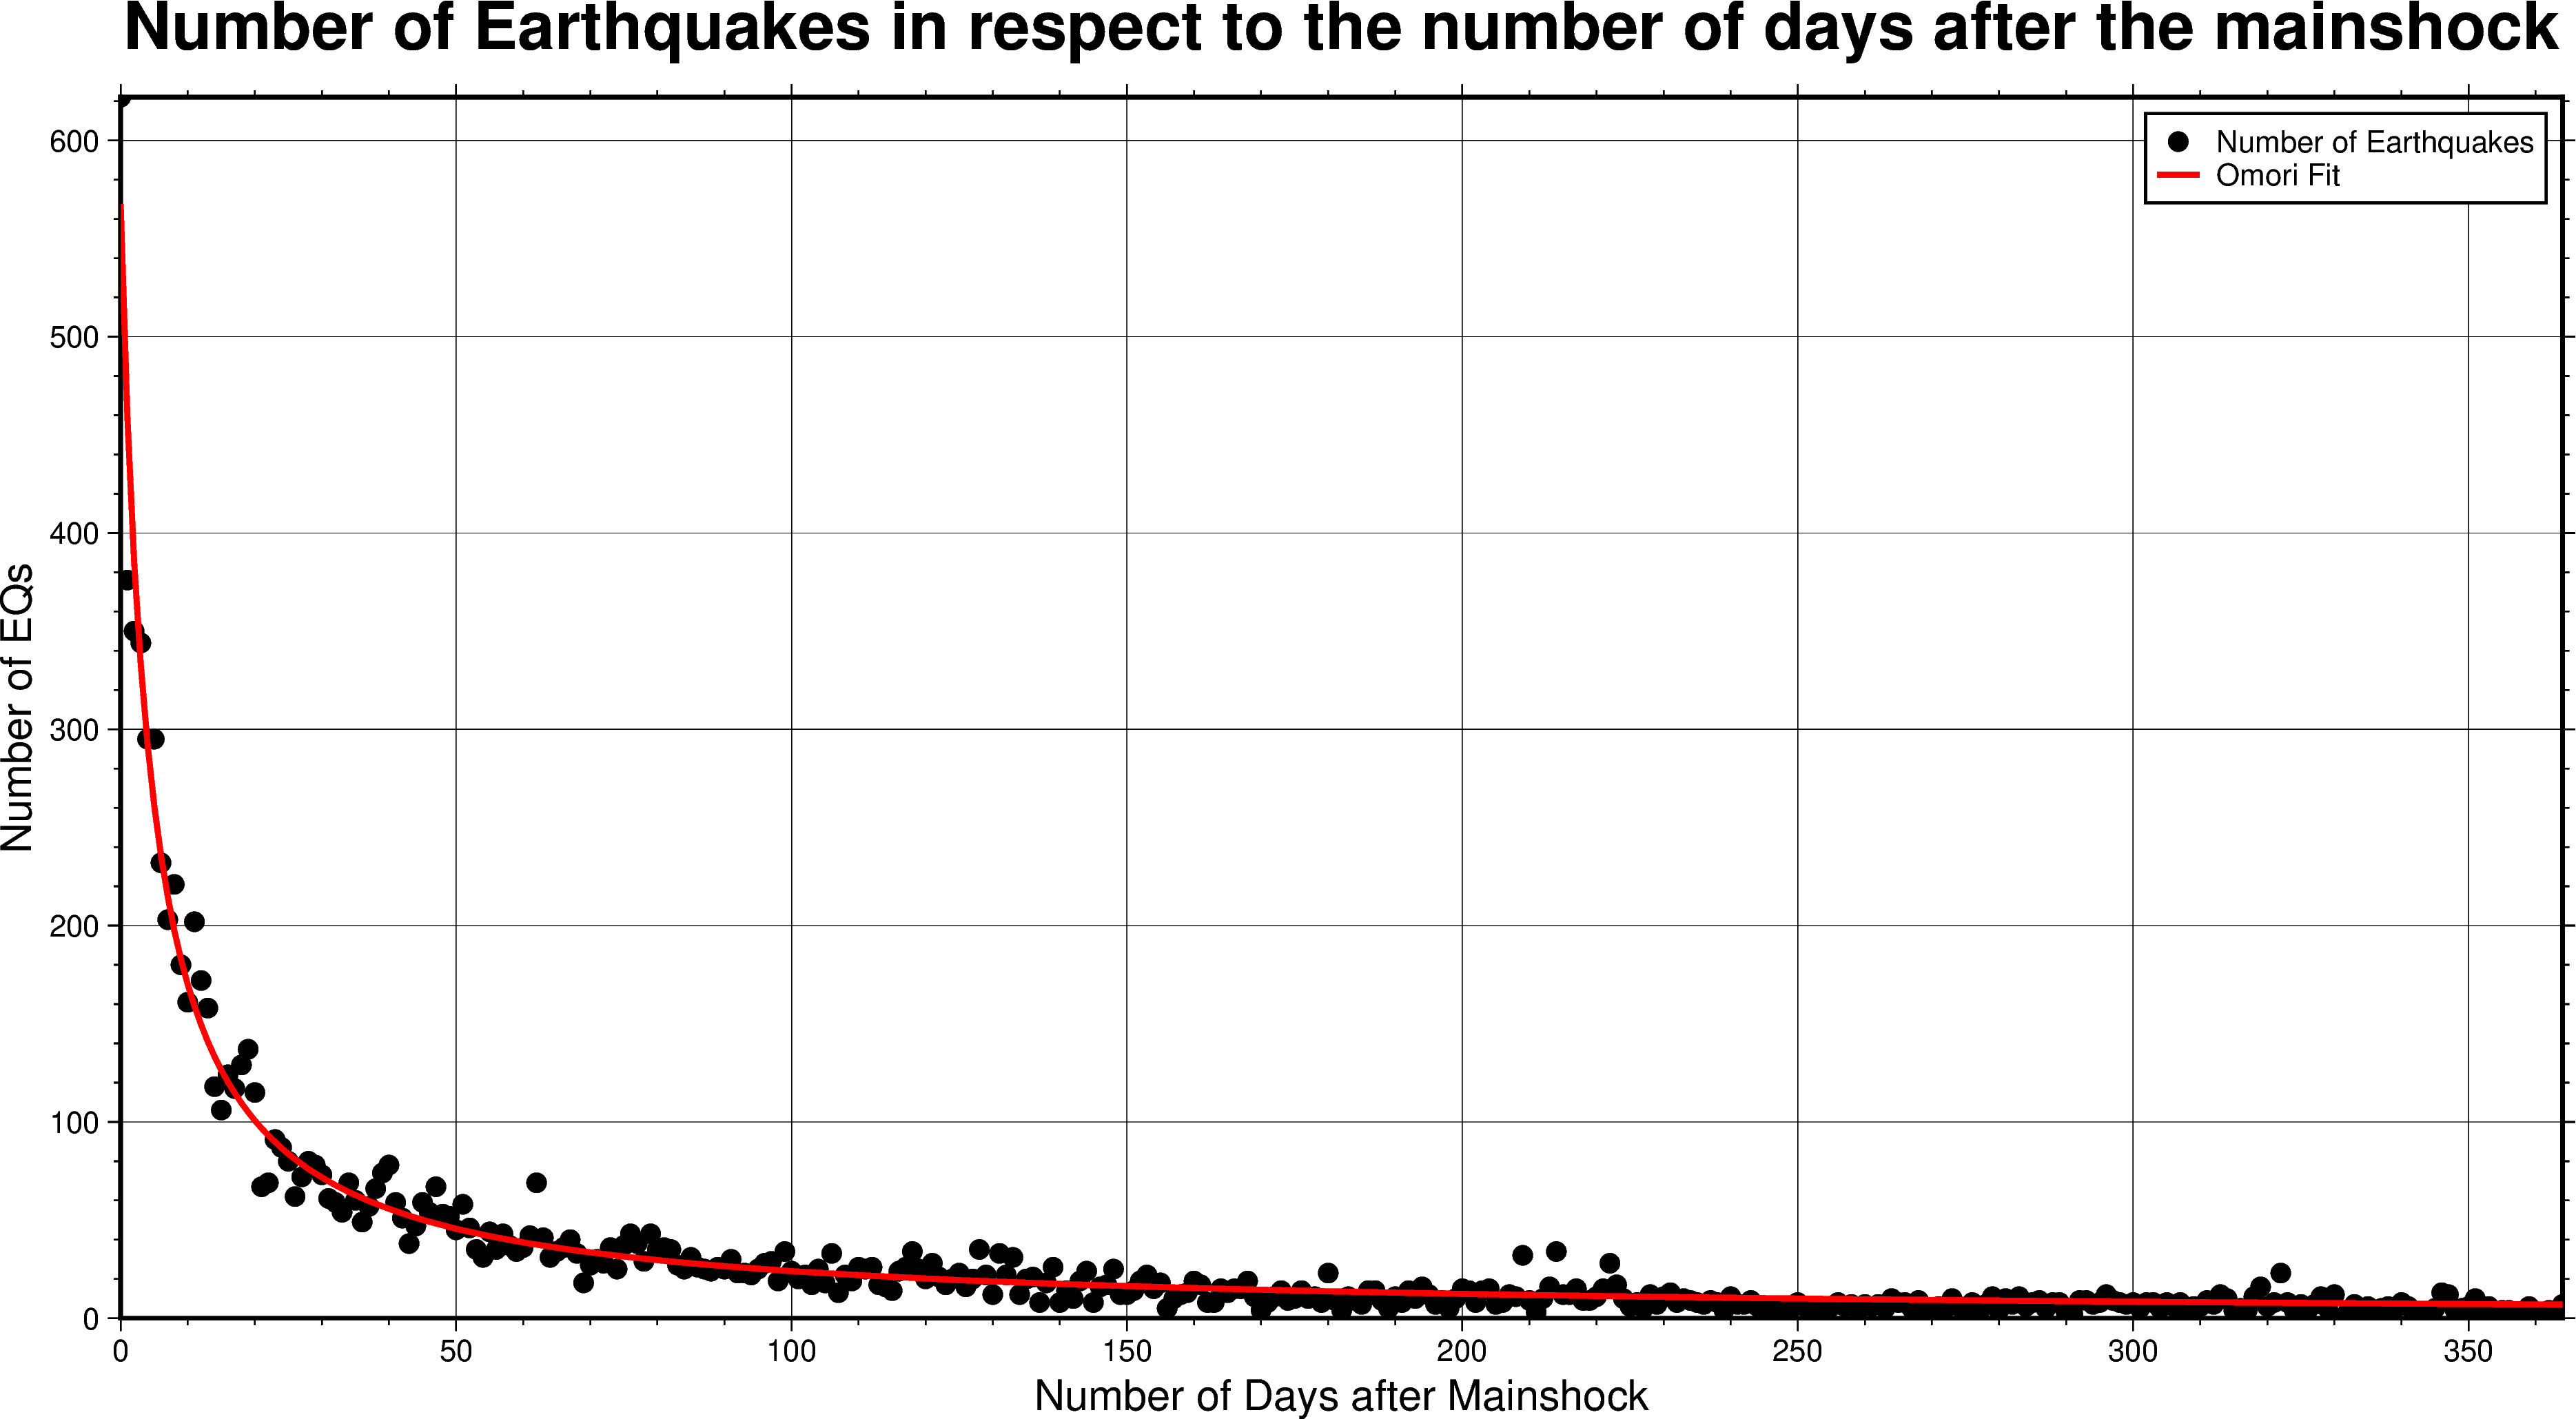

In [16]:
#Now to plot
#Plotting the raw data of magnitudes and dates for each time frame
region=[0,np.max(t),0,np.max(n_t)]
fig = pygmt.Figure()

fig.basemap(region=region, projection='X30c/15c', frame=[
            'WSen+tNumber of Earthquakes in respect to the number of days after the mainshock',
            'xafg+lNumber of Days after Mainshock',
            'yafg+lNumber of EQs'
            ])

fig.plot(x=t,y=n_t,style='c0.25c',fill='black',label='Number of Earthquakes')
fig.plot(x=t,y=omori_line_fit,pen='2p,red',label='Omori Fit')

fig.legend()
fig.savefig('Figures/Omori_Fit.pdf')
fig.show()

# Fitting a plane... or at least trying to... tried to.... 

I first need to change the lat and lon to UTM
https://pypi.org/project/utm/
This next cell is me testing out example code then seeing if there's an option to reverse it later in case I need it for plotting

In [17]:

# Example latitude and longitude
latitude = 34.44700 
longitude = -118.60400 

# Convert to UTM
easting, northing, zone_number, zone_letter = utm.from_latlon(latitude, longitude)

# Print the results
print(f"Easting: {easting}")
print(f"Northing: {northing}")
print(f"UTM Zone Number: {zone_number}")
print(f"UTM Zone Letter: {zone_letter}")

lat_back, lon_back = utm.to_latlon(easting, northing, zone_number, zone_letter)
print('lat',lat_back, 'lon',lon_back)

print('Cool this works! Now to try with the data')



Easting: 352647.4787311797
Northing: 3812887.121663217
UTM Zone Number: 11
UTM Zone Letter: S
lat 34.44700000211426 lon -118.60400000003963
Cool this works! Now to try with the data


In [18]:
#Quick Sanity Check
#All_Events_mag_depth_and_loc=data1[['Date_Time','mag','depth','lat','lon']]
#All_Events_mag_depth_and_loc

#I'm making a new dataframe with just the things I'm going to need
All_Events_mag_depth_and_loc=data1[['mag','depth','lat','lon']].copy()
#All_Events_mag_depth_and_loc

#Now make my array, I'm basically doing what I did in the test cell but for all coords
lat_array=np.array(All_Events_mag_depth_and_loc.lat)
lon_array=np.array(All_Events_mag_depth_and_loc.lon)

# Convert to UTM
easting, northing, zone_number, zone_letter = utm.from_latlon(lat_array,lon_array)

#Save each as a new column
All_Events_mag_depth_and_loc['easting']=easting
All_Events_mag_depth_and_loc['northing']=northing
All_Events_mag_depth_and_loc['zone_number']=zone_number
All_Events_mag_depth_and_loc['zone_letter']=zone_letter

#Checking how it looks now...

All_Events_mag_depth_and_loc

#Cool we're good! Yay!


mag  depth     lat      lon        easting      northing  zone_number  \
0      1.50    8.7  34.447 -118.604  352647.478731  3.812887e+06           11   
1      1.63    4.0  34.439 -118.603  352725.310334  3.811998e+06           11   
2      1.32   14.2  34.500 -118.715  342548.937399  3.818932e+06           11   
3      1.89   13.9  34.500 -118.713  342732.573577  3.818929e+06           11   
4      1.16   16.3  34.492 -118.712  342809.372806  3.818040e+06           11   
...     ...    ...     ...      ...            ...           ...          ...   
11092  0.90   20.9  34.367 -118.755  338620.642556  3.804245e+06           11   
11093  1.21    9.0  34.299 -118.456  366009.185625  3.796269e+06           11   
11094  1.27   11.4  34.266 -118.432  368166.466000  3.792578e+06           11   
11095  1.70   10.3  34.278 -118.478  363950.583976  3.793969e+06           11   
11096  1.12    4.5  34.341 -118.546  357796.945278  3.801049e+06           11   

      zone_letter  
0               S  
1               S  
2               S  
3               S  
4               S  
...           ...  
11092           S  
11093           S  
11094           S  
11095           S  
11096           S  

[11097 rows x 8 columns]

In [19]:
#OK Now for the inversion! Woooo!
#This is going to be similar to what we did in the keeling homework but now we aren't squaring...or cubing anything. 
#This is the plane equation 

#ax+by+c=z(depth)

#Set up our A matrix which has UTM_x (lon/easting) and UTM_y (lat/northing) and C (whole bunch of ones)
#Get things into a numpy array again also, since depth is in Km... I'm making everything into Km.

UTM_X=np.array(All_Events_mag_depth_and_loc.easting)/1000 #km
UTM_y=np.array(All_Events_mag_depth_and_loc.northing)/1000 #km
depth_Z=np.array(All_Events_mag_depth_and_loc.depth) #km

#ok NOW Set up that matrix
A_col1=UTM_X #Ax
A_col2=UTM_y #By
A_col3=np.ones(np.size(A_col2)) #C ones

A_col_1_reshaped = A_col1.reshape(-1, 1) #Reshaping these so that they're a column
A_col_2_reshaped = A_col2.reshape(-1, 1) #Reshaping these so that they're a column
A_col_3_reshaped = A_col3.reshape(-1, 1) #Reshaping these so that theyre a column

A = np.hstack((A_col_1_reshaped,A_col_2_reshaped,A_col_3_reshaped)) #Combining these into A

#Set up out d matrix which has our depth (z)

d_horizontal=depth_Z #km
d = d_horizontal.reshape(-1, 1) #now it is vertical

#Calculating out m matirx which is going to have A,B,C for the plane equation 
# construct the normal equations in matrix form
ATA=np.matmul(A.T,A)
ATd=np.matmul(A.T,d)

# invert ATA and multiply that by ATd
m=np.matmul(np.linalg.inv(ATA),ATd)

print('A',m[0],'B',m[1],'C',m[2])

# So from here... I decided to put a pause on coding and work on the write up for the sake of time. 
# I'll include a relfection sectin and what the next steps would have been in the write up. 



A [-0.15011668] B [-0.15473948] C [650.10943283]
